# Watershed Segmentation Example

The watershed technique for image segmentation is based on the topography of the image and, to obtain good results, it is usually necessary to define markers (seeds) to guide the segmentation. This is a reasonably complex technique, and the results obtained are often not good, due to a lack of knowledge of the correct way to apply it. The example below presents just one of the ways to use it.

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

import skimage.morphology as mm
from skimage.segmentation import watershed, join_segmentations
from skimage.segmentation import mark_boundaries

### Segmentation using Watershed by markers

Let's try to solve the problem of segmenting lean meat in an image of a steak using the Watershed Transform. Many of the functions we will use here are derived from Mathematical Morphology, and can be consulted in the skimage library documentation [(link)](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage .morphology.opening). Before using the watershed algorithm, we have to first find the internal and external markers.

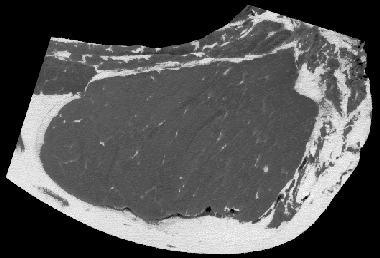

In [2]:
a_pil = Image.open('../figures/beef.tif')
a_pil

First we use a closing operation (*closing*, from mathematical morphology) and a thresholding to obtain the entire steak.

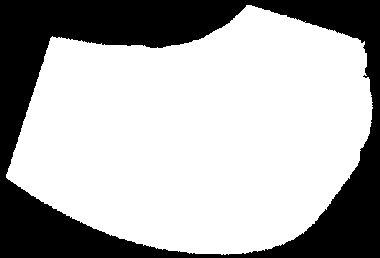

In [3]:
a = np.array(a_pil)
b = mm.closing(a, mm.disk(2))
Image.fromarray(b)
c = (a >= 10)
d = mm.remove_small_holes(c,30)
Image.fromarray(d.astype(np.uint8)*255)

Then, calculate the outer edge of the steak, using the erosion operation. The result of the thresholded image minus its erosion provides us with the external marker.

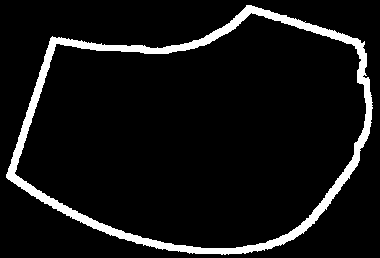

In [4]:
e = np.logical_xor(d,mm.erosion(d, mm.square(13)))
Image.fromarray(e.astype(np.uint8)*255)

Using the external marker and an erosion operation with a very large structuring element, we obtain the internal marker (in relation to the object we want to segment).

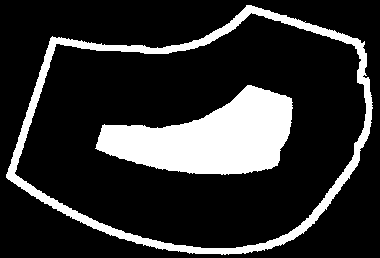

In [5]:
f = mm.erosion(d, mm.diamond(80))
m_int = f.astype(np.uint8)*1
m_ext = e.astype(np.uint8)*2
g = m_int + m_ext
#g = e + f
Image.fromarray(g.astype(np.uint8)*255)

Finally, after calculating the external and internal markers, we combine the two into a single image and use watershed to find the edge of the object of interest.

Text(0.5, 1.0, 'Overlapped watershed line')

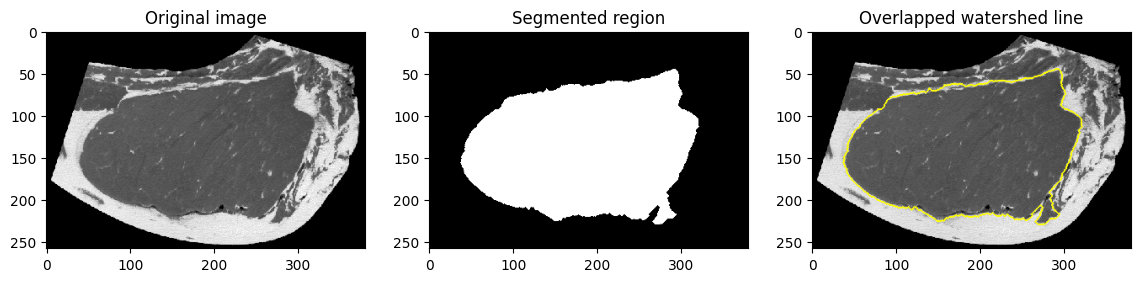

In [6]:
h = b - mm.erosion(b, mm.diamond(3))
markers = g.astype(np.uint8)*255
i = watershed(h,markers)


plt.figure(1, figsize=(14,8))

plt.subplot(1,3,1)
plt.imshow(a, cmap='gray')
plt.title('Original image')
plt.subplot(1,3,2)
plt.imshow(i, cmap='gray')
plt.title('Segmented region')
plt.subplot(1,3,3)
plt.imshow(mark_boundaries(a,i))
plt.title('Overlapped watershed line')
